In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import numpy as np
import datetime as dt
from scipy import stats as st
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

<h2 style="color:blue;">Vamos a trabajar con la Base de Datos "hipot"</h2>

In [3]:
hipot = pd.read_csv('./data/hypotheses_us.csv', sep=';')

In [4]:
hipot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [5]:
hipot.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
hipot.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [7]:
print(hipot.isnull().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


In [8]:
hipot.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [9]:
hipot = hipot.drop_duplicates()
print(hipot.duplicated().sum())
hipot.reset_index(drop=True)

0


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Aplicaremos un framework "ICE" para realizar una priorización de las Hipotesis

In [10]:
print(hipot)
hipot['ICE'] = (hipot['Impact']*hipot['Confidence'])/hipot['Effort']
print(hipot[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
                                          Hypothe

Los resultados obtenidos a través del framework ICE demuestran que las hipótesis con los puntajes más altos representan las mejores oportunidades para nuestro proyecto. Esto se debe a que combinan un alto Impacto y Confianza con un bajo Esfuerzo requerido. Por lo tanto, se recomienda priorizar la implementación de las tres primeras hipótesis, ya que prometen el mayor retorno de inversión. Las hipótesis con los puntajes más bajos, por su parte, deben ser consideradas de menor prioridad.

Realizaremos un gráfico para observar mejor los resultados

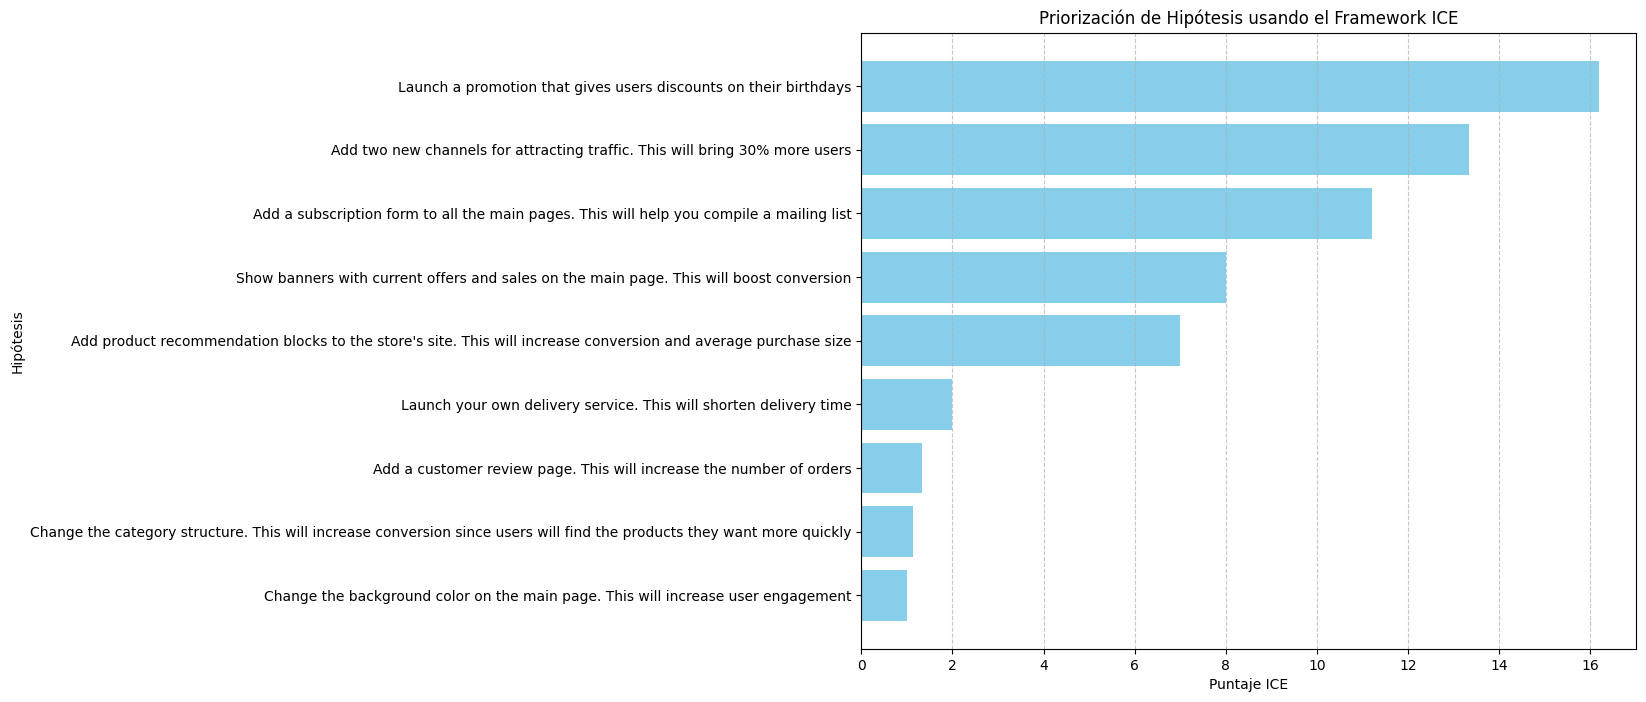

In [11]:
hipot_importancia = hipot.sort_values(by='ICE', ascending=True)
plt.figure(figsize=(10, 8)) 
plt.barh(hipot_importancia['Hypothesis'], hipot_importancia['ICE'], color='skyblue')

plt.xlabel('Puntaje ICE')
plt.ylabel('Hipótesis')
plt.title('Priorización de Hipótesis usando el Framework ICE')
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()

Aplicaremos el framework "RICE" para priorizar las Hipotesis.

In [12]:
print(hipot)
hipot['RICE'] = (hipot['Reach']*hipot['Impact'])*hipot['Confidence']/hipot['Effort']
print(hipot[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort        ICE  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  
5           2       3   1.333333  
6           8       3   8.000000  
7        

Al utilizar RICE, no solo se toma en cuenta qué tan bien se ve una hipotesis, sino también a cuánta gente impacta y cuánto costará llevarla a cabo. 
    Por eso algunas hipotesis que parecían primeras con ICE ahora bajan, y otras suben. 
    Así priorizamos de forma más estratégica y nos ayuda a avanzar y hacer crecer el negocio.

<h2 style="color:blue;">Vamos a trabajar con la Base de Datos "pedidos" y "visitas"</h2>

In [13]:
pedidos = pd.read_csv('./data/orders_us.csv', sep=',')

In [14]:
visitas = pd.read_csv('./data/visits_us.csv', sep=',')

In [15]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [16]:
pedidos.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [17]:
pedidos.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [18]:
print(pedidos.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [19]:
pedidos.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Length: 1197, dtype: bool

In [20]:
pedidos = pedidos.drop_duplicates()
print(pedidos.duplicated().sum())
pedidos.reset_index(drop=True)

0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


<!-- Se realizó un proceso de limpieza para identificar y eliminar cualquier fila duplicada en el conjunto de datos del dataset "pedidos". La verificación inicial reveló que no existían duplicados, por lo que la eliminación de filas no fue necesaria. Como resultado, el tamaño del conjunto de datos se mantuvo en sus 1197 filas originales, confirmando que los datos están limpios y listos para un análisis posterior sin pérdida de información. -->

In [21]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
visitas.columns

Index(['date', 'group', 'visits'], dtype='object')

In [23]:
visitas.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
print(visitas.isnull().sum())

date      0
group     0
visits    0
dtype: int64


In [25]:
visitas.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [26]:
visitas = visitas.drop_duplicates()
print(visitas.duplicated().sum())
visitas.reset_index(drop=True)

0


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<h4  style="color:blue;">Vamos a Realizar Análisis Diversos a Nuestro Test A/B "</h2

Vamos a obtener los Ingresos Acumulados por Grupo

In [27]:
fecha_agrupada = pedidos[['date','group']].drop_duplicates()
pedidosAgregados = fecha_agrupada.apply(lambda x: pedidos[np.logical_and(pedidos['date'] <= x['date'], pedidos['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitasAgregadas = fecha_agrupada.apply(lambda x: visitas[np.logical_and(visitas['date'] <= x['date'], visitas['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(visitasAgregadas.head())

           date group  visits
55   2019-08-01     A     719
66   2019-08-01     B     713
175  2019-08-02     A    1338
173  2019-08-02     B    1294
291  2019-08-03     A    1845


In [47]:
datos_acumulados = pedidosAgregados.merge(visitasAgregadas, left_on=['date', 'group'], right_on=['date', 'group'])
datos_acumulados.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
print(datos_acumulados.head())

         date group  orders  buyers  revenue  visits
0  2019-08-01     A      24      20   2356.8     719
1  2019-08-01     B      21      20   1620.0     713
2  2019-08-02     A      44      38   3860.3    1338
3  2019-08-02     B      45      43   4243.8    1294
4  2019-08-03     A      68      62   5675.5    1845


Realizaremos la Gráfica de Nuestros Datos obtenidos

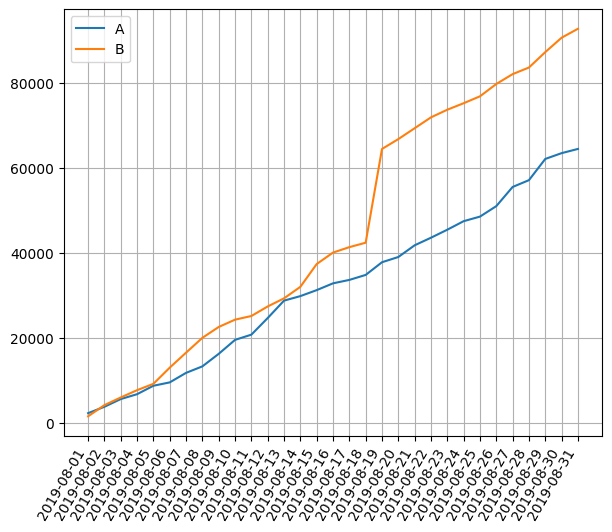

In [29]:
IngresosacumuladosA = datos_acumulados[datos_acumulados['group']=='A'][['date','revenue', 'orders']]
IngresosacumuladosB = datos_acumulados[datos_acumulados['group']=='B'][['date','revenue', 'orders']]
plt.plot(IngresosacumuladosA['date'], IngresosacumuladosA['revenue'], label='A')
plt.plot(IngresosacumuladosB['date'], IngresosacumuladosB['revenue'], label='B')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=60, ha='right')

plt.show()


Podemos observar cómo se comportan los ingresos acumulados de nuestros dos grupos a lo largo del tiempo. Vemos que el Grupo A  muestra un crecimiento más regular comparado con el Grupo B. Esto podría indicar que la variante del Grupo A tuvo un mejor desempeño en términos de valor por usuario.

Trazaremos una Gráfica de el promedio de compra por grupo

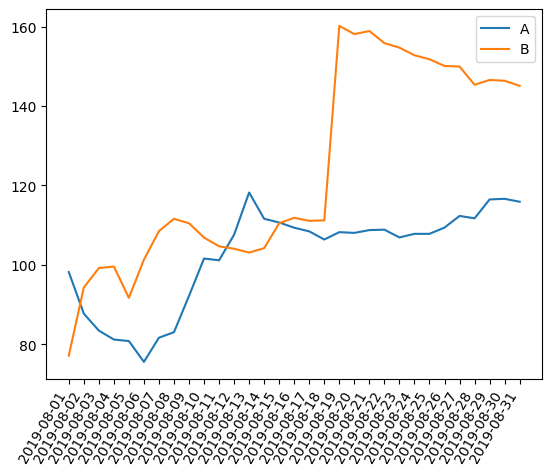

In [30]:
plt.plot(IngresosacumuladosA['date'], IngresosacumuladosA['revenue']/IngresosacumuladosA['orders'], label='A')
plt.plot(IngresosacumuladosB['date'], IngresosacumuladosB['revenue']/IngresosacumuladosB['orders'], label='B')
plt.xticks(rotation=60, ha='right')

plt.legend()


Podemos observar  el ingreso promedio por pedido en cada grupo, a lo largo del tiempo. Nos muestra cuánto gana el negocio, en promedio, por cada orden que hacen los clientes de cada grupo.

Vamos a Realizar una Gráfica para conocer la diferencia Relativa en el Tamaño de pedido promedio acumulado, haciendo una comparación entre ambos grupos

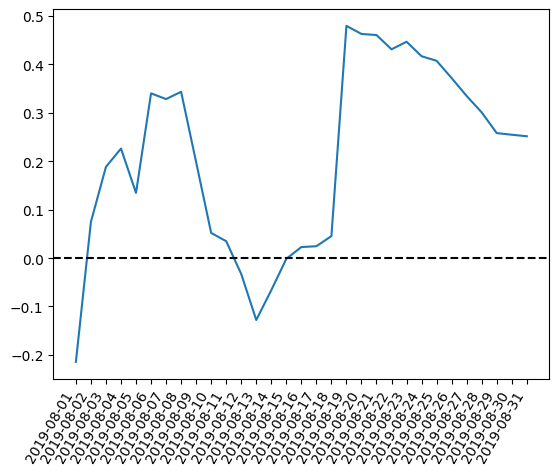

In [31]:
mediaingresosacumulados = IngresosacumuladosA.merge(IngresosacumuladosB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mediaingresosacumulados['date'], (mediaingresosacumulados['revenueB']/mediaingresosacumulados['ordersB'])/(mediaingresosacumulados['revenueA']/mediaingresosacumulados['ordersA'])-1)
plt.xticks(rotation=60, ha='right')

plt.axhline(y=0, color='black', linestyle='--')


Observamos que, si el valor está por encima de 0, significa que el Grupo B gana más por pedido que el A.
Si está por debajo de 0, entonces el Grupo A tiene un ingreso promedio mayor.
La línea punteada negra en y=0 actúa como una línea base para comparar.



Calcularemos la tasa de conversión de cada grupo así como la realción entre los pedidos y el número de visitas de cada día

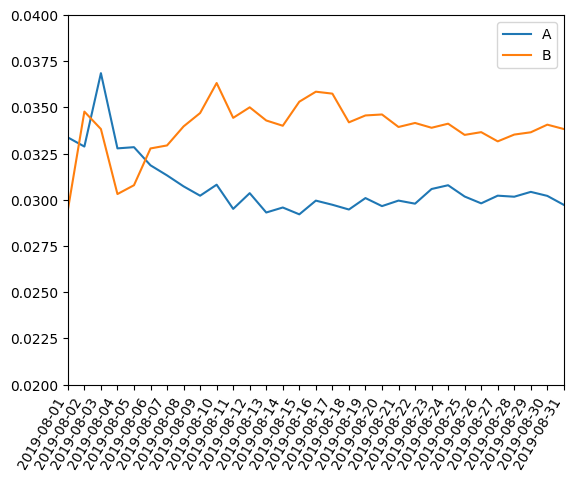

In [32]:
datos_acumulados['conversion'] = datos_acumulados['orders']/datos_acumulados['visits']
datosacumuladosA = datos_acumulados[datos_acumulados['group']=='A']
datosacumuladosB = datos_acumulados[datos_acumulados['group']=='B']

plt.plot(datosacumuladosA['date'], datosacumuladosA['conversion'], label='A')
plt.plot(datosacumuladosB['date'], datosacumuladosB['conversion'], label='B')
plt.xticks(rotation=60, ha='right')
plt.xlim(["2019-08-01", '2019-08-31'])
plt.ylim(0.02, 0.040)

plt.legend()
plt.show()

Este gráfico muestra el porcentaje de visitas diarias que se convierten en pedidos, para los grupos A y B durante agosto de 2019.
Identificamos las  tendencias como aumentos, caídas o estabilidad en el comportamiento de los usuarios, y así analizar el desempeño de cada grupo en términos de efectividad para convertir visitas en compras. Al observar las diferencias entre ambas líneas, se puede evaluar si uno de los grupos tuvo un rendimiento consistentemente superior, lo que ayudaría a decidir cuál estrategia o versión resultó más exitosa.


Haremos un Gráfico para observar la diferencia Relativa entre las tasas de conversión

(np.float64(0.0), np.float64(30.0), np.float64(-0.6), np.float64(0.6))

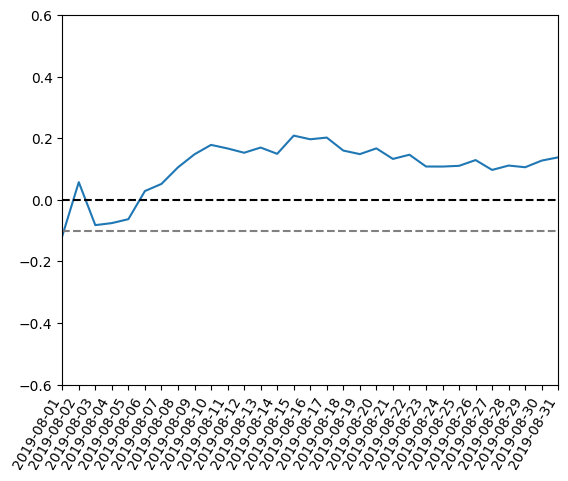

In [33]:
fusionconversionesacumuladas = datosacumuladosA[['date','conversion']].merge(datosacumuladosB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(fusionconversionesacumuladas['date'], fusionconversionesacumuladas['conversionB']/fusionconversionesacumuladas['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=60, ha='right')
plt.axis(["2019-08-01", "2019-08-31", -0.6, 0.6])




Podemos observar el comportamiento de si el grupo B tuvo mejor o peor conversión que el grupo A. 
Se dibuja una línea que muestra cuánto más o cuanto menos  convirtió B respecto a A: si la línea está por encima de cero, B fue mejor; si está por debajo, A tuvo mejor conversión. Las líneas punteadas sirven como guía visual, y el gráfico se enfoca solo en agosto, con valores entre –60 % y +60 %. Es una forma rápida de ver quién tuvo ventaja y si esa diferencia fue constante o variable.


Realizaremos dos Gráficos, un histograma y uno de Dispersión del número de Pedidos por Usuario

In [34]:
ordenesporusuario = (pedidos.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordenesporusuario.columns = ['userId', 'orders']

print(ordenesporusuario.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
299   1230306981       5
55     237748145       5
744   3062433592       5
897   3717692402       5
917   3803269165       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

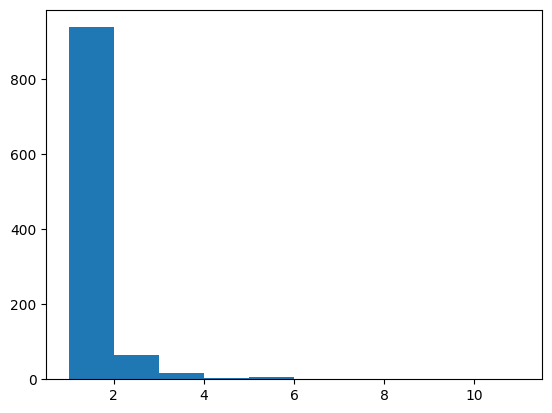

In [35]:
plt.hist(ordenesporusuario['orders'])

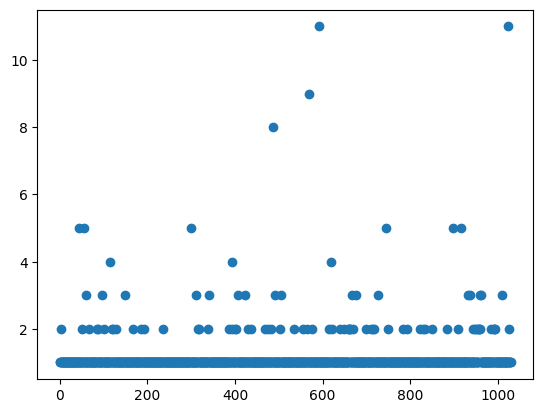

In [36]:
x_values = pd.Series(range(0,len(ordenesporusuario)))

plt.scatter(x_values, ordenesporusuario['orders'])

En esta visualización estamos detectando datos importantes.
Normalmente la mayoría de los usuarios realizaron solo un pedido, mientras que otros hicieron varios, lo que puede señalar a clientes frecuentes o anomalías,como usuarios especiales o posibles oportunidades comerciales.

Se Realizará el calculo de los Percentiles de los Pedidos por Usuario

In [37]:
print(np.percentile(ordenesporusuario['orders'], [95, 99]))

[2. 4.]


Con base en los percentiles calculados (95 = 2 y 99 = 4), podemos decir que el comportamiento típico de los usuarios es hacer entre 1 y 4 pedidos. Esto significa que cualquier usuario con más de 4 pedidos está fuera del rango esperado para el 99 % de la población y, por lo tanto, puede considerarse una anomalía estadística.


Realizaremos un Gráfico de Dispersión delos precios de los Pedidos

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+00, 1.996540e+03, 3.988080e+03, 5.979620e+03,
        7.971160e+03, 9.962700e+03, 1.195424e+04, 1.394578e+04,
        1.593732e+04, 1.792886e+04, 1.992040e+04]),
 <BarContainer object of 10 artists>)

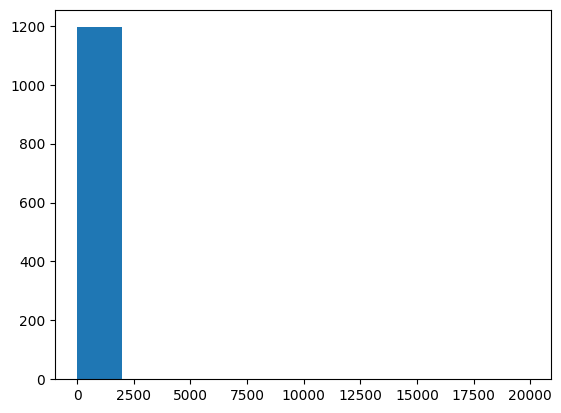

In [38]:
plt.hist(pedidos['revenue'])

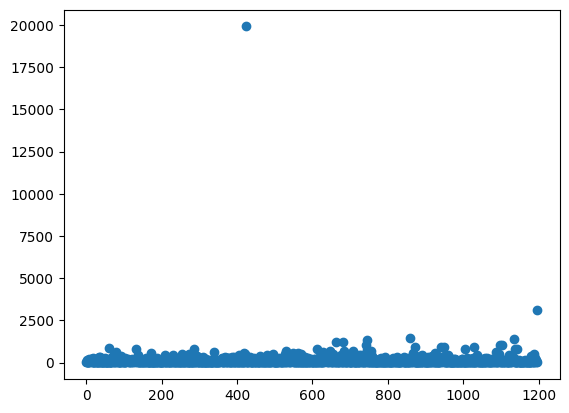

In [39]:
x_values = pd.Series(range(0, len(pedidos['revenue'])))
plt.scatter(x_values, pedidos['revenue'])

La visualización de este gráfico permite detectar lo variable que son los precios, se pueden observar muchos pedidos con valores bajos y algunos con montos considerablemente más altos.
 lo que sugiere una concentración de ingresos en unos pocos pedidos grandes. Estos puntos elevados podrían corresponder a clientes especiales, productos premium o hasta incluso posibles errores de captura que ameritan una revisión más detallada.


In [40]:
print(np.percentile(pedidos['revenue'], [95, 99]))

[435.54  900.904]


El cálculo de los percentiles 95 y 99 del valor de los pedidos revela que el 95 % de las órdenes tienen un precio igual o menor a 435.54, y que solo el 1 % más alto supera los 900.90. Esto significa que un pedido con un valor superior a 900.90 se comporta de forma excepcional respecto al resto y puede considerarse una anomalía por exceso. Detectar estos casos es útil para identificar compras inusuales que podrían corresponder a errores, transacciones especiales o clientes estratégicos con un alto impacto en los ingresos.

Vamos a obtener la significancia Estadistica de la diferencia en la conversión entre los grupos utilizando los datos en bruto.
    Esto con la Prueba de Estadistica 'Z' de 2 proporciones.

In [48]:
pedidos['conversion'] = pedidos['revenue'] > 0
conversiones = pedidos.groupby('group')['conversion'].sum().reset_index()
visitas_totales = visitas.groupby('group')['visits'].sum().reset_index()

df = pd.merge(conversiones, visitas_totales, on='group')
df.columns = ['group', 'conversions', 'visits']

df['conversion_rate'] = df['conversions'] / df['visits']
print(df)


counts = df['conversions'].values  
nobs = df['visits'].values         

stat, pval = proportions_ztest(count=counts, nobs=nobs)
print(f"\nEstadístico Z: {stat:.4f}")
print(f"Valor p: {pval:.4f}")

# Interpretación
if pval < 0.05:
    print(" La diferencia en la tasa de conversión es estadísticamente significativa.")
else:
    print(" No se encontró evidencia estadística de una diferencia significativa en la conversión entre los grupos.")


  group  conversions  visits  conversion_rate
0     A          557   18736         0.029729
1     B          640   18916         0.033834

Estadístico Z: -2.2700
Valor p: 0.0232
 La diferencia en la tasa de conversión es estadísticamente significativa.


En este análisis comparamos las tasas de conversión entre dos grupos para saber si la diferencia entre ellos es realmente importante o si solo ocurrió por casualidad. Identificamos una conversión cuando hubo ingresos mayores a cero, y luego calculamos cuántas conversiones hubo por grupo en relación con la cantidad de visitas. Finalmente aplicamos una prueba estadística que nos ayuda a confirmar si esa diferencia es significativa. Este tipo de análisis es clave en pruebas A/B para tomar decisiones con base en datos reales.

Haremos La Prueba de Normalidad (Shapiro-Wilk) para asegurarnos que los resultados de nuestra prueba estadistica "t de dos muestras" son confiables

In [42]:
pedidos_filtrados = pedidos[pedidos['revenue'] > 0]
grupo_A = pedidos_filtrados[pedidos_filtrados['group'] == 'A']['revenue']
grupo_B = pedidos_filtrados[pedidos_filtrados['group'] == 'B']['revenue']

print('--- Prueba de Normalidad (Shapiro-Wilk) ---')
shapiro_A, p_shapiro_A = st.shapiro(grupo_A)
print(f"Grupo A - Valor p: {p_shapiro_A:.4f}")
if p_shapiro_A < 0.05:
    print("El supuesto de normalidad NO se cumple.")
else:
    print("El supuesto de normalidad SÍ se cumple.")
shapiro_B, p_shapiro_B = st.shapiro(grupo_B)
print(f"Grupo B - Valor p: {p_shapiro_B:.4f}")
if p_shapiro_B < 0.05:
    print("El supuesto de normalidad NO se cumple.")
else:
    print("El supuesto de normalidad SÍ se cumple.")

--- Prueba de Normalidad (Shapiro-Wilk) ---
Grupo A - Valor p: 0.0000
El supuesto de normalidad NO se cumple.
Grupo B - Valor p: 0.0000
El supuesto de normalidad NO se cumple.


Haremos La Prueba de Homogeneidad de Varianzas (Levene) para asegurarnos que los resultados de nuestra prueba estadistica "t de dos muestras" son confiables

In [43]:
pedidos_filtrados = pedidos[pedidos['revenue'] > 0]
grupo_A = pedidos_filtrados[pedidos_filtrados['group'] == 'A']['revenue']
grupo_B = pedidos_filtrados[pedidos_filtrados['group'] == 'B']['revenue']

print('\n--- Prueba de Homogeneidad de Varianzas (Levene) ---')
levene_stat, p_levene = st.levene(grupo_A, grupo_B)
print(f"Valor p: {p_levene:.4f}")
if p_levene < 0.05:
    print("El supuesto de homogeneidad de varianzas NO se cumple.")
else:
    print("El supuesto de homogeneidad de varianzas SÍ se cumple.")


--- Prueba de Homogeneidad de Varianzas (Levene) ---
Valor p: 0.4207
El supuesto de homogeneidad de varianzas SÍ se cumple.


Con base en las pruebas realizadas, observamos que los datos no tienen una distribución adecuada para la prueba t, por lo que los resultados de dicha prueba no serían confiables ni precisos.

Vamos a obtener la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.
    Esto atraves de una prueba estadistica 'Prueba t de dos muestras'.

In [44]:
pedidos_filtrados = pedidos[pedidos['revenue'] > 0]

grupo_A = pedidos_filtrados[pedidos_filtrados['group'] == 'A']['revenue']
grupo_B = pedidos_filtrados[pedidos_filtrados['group'] == 'B']['revenue']

print(f"Tamaño promedio A: {grupo_A.mean():.2f} | Tamaño promedio B: {grupo_B.mean():.2f}")

stat, pval = ttest_ind(grupo_A, grupo_B, equal_var=False)
print(f"\nEstadístico t: {stat:.4f}")
print(f"Valor p: {pval:.4f}")

if pval < 0.05:
    print(" La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa.")
else:
    print(" No hay evidencia suficiente para afirmar que exista una diferencia significativa en el tamaño promedio de pedido.")


Tamaño promedio A: 115.90 | Tamaño promedio B: 145.06

Estadístico t: -0.8886
Valor p: 0.3745
 No hay evidencia suficiente para afirmar que exista una diferencia significativa en el tamaño promedio de pedido.


En este análisis, comparamos si el tamaño promedio de los pedidos es diferente entre los grupos A y B. Primero, filtramos los pedidos con ingresos positivos y calculamos las métricas clave para cada grupo.

Para determinar si la diferencia observada era estadísticamente significativa, realizamos pruebas de supuestos. Como los datos no cumplen con la condición de normalidad para una prueba t, 
Vamos a realizar una prueba no paramétrica (Mann-Whitney U), la cual es más adecuada para este tipo de datos.

Este tipo de análisis es crucial para saber si una nueva estrategia realmente influye en el valor de los pedidos o si las diferencias observadas se deben simplemente al azar.

Vamos a obtener la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.
Utilizaremos la Prueba estadística "Mann-Whitney U"    

In [ ]:
pedidosusuariosA = pedidos[pedidos['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
pedidosusuariosA.columns = ['visitorId', 'orders']

pedidosusuariosB = pedidos[pedidos['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
pedidosusuariosB.columns = ['visitorId', 'orders']

muestraA = pd.concat([
    pedidosusuariosA['orders'],
    pd.Series(0, index=np.arange(visitas[visitas['group'] == 'A']['visits'].sum() - pedidosusuariosA.shape[0]), name='orders')
], axis=0)

muestraB = pd.concat([
    pedidosusuariosB['orders'],
    pd.Series(0, index=np.arange(visitas[visitas['group'] == 'B']['visits'].sum() - pedidosusuariosB.shape[0]), name='orders')
], axis=0)

pval = st.mannwhitneyu(muestraA, muestraB)[1]
efecto = muestraB.mean() / muestraA.mean() - 1

print(f"Valor p: {pval:.3f}")
print(f"Diferencia relativa: {efecto:.3f}")


Valor p: 0.017
Diferencia relativa: 0.138


Con un valor p de 0.017, que es menor al nivel de significancia de 0.05, podemos afirmar que la diferencia en el número de pedidos por usuario entre los grupos es estadísticamente significativa. Este resultado confirma que la variación observada no es producto del azar.

Adicionalmente, la diferencia relativa del 13.8% indica que el grupo que recibió la nueva estrategia (Grupo B) realizó, en promedio, un mayor número de pedidos por usuario en comparación con el grupo de control (Grupo A). Esto sugiere que la estrategia implementada fue efectiva y tuvo un impacto positivo en la tasa de pedidos.


Vamos a obtener la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [46]:
print('{0:.3f}'.format(stats.mannwhitneyu(pedidos[pedidos['group']=='A']['revenue'], pedidos[pedidos['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(pedidos[pedidos['group']=='B']['revenue'].mean()/pedidos[pedidos['group']=='A']['revenue'].mean()-1))


0.692
0.252


En este análisis comparamos los ingresos por pedido entre los grupos A y B.
 El resultado fue un valor p de 0.692, lo que indica que no hay una diferencia significativa entre los grupos; es decir, cualquier diferencia en los ingresos promedio podría deberse al azar. Aunque el grupo B tuvo en promedio un 25.2% más ingresos que el grupo A, esta diferencia no es lo suficientemente clara como para considerarse confiable desde el punto de vista estadístico.



<h4 style="color:blue;">CONCLUSION"</h2>

Con base en el análisis realizado, hemos identificado una diferencia estadísticamente significativa en el número de pedidos por usuario entre los grupos A y B, con un aumento del 13.8% en el Grupo B.

Sin embargo, dado el valor p (0.017), el cual está cerca del umbral de significancia, y para garantizar una decisión más robusta, se recomienda continuar la prueba durante un período de tiempo adicional. Esto nos permitirá recopilar más datos, lo que podría confirmar de manera más sólida la superioridad de uno de los grupos o revelar si la diferencia observada se mantiene en el largo plazo.

Detener la prueba en este punto podría ser prematuro y podría llevar a una decisión basada en evidencia incompleta. La continuación del experimento proporcionará una base más sólida para una decisión de negocio final y más confiable.